<a href="https://colab.research.google.com/github/Someshwarms/weather-prediction-model-for-rainfall/blob/main/Weather%20Prediction%20model%20for%20rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.over_sampling  import RandomOverSampler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from collections import Counter

**Loading and importing all the packages and files for this project.Link to download the dataset:https://www.kaggle.com/jsphyg/weather-dataset-rattle-package**

In [99]:
df=pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [100]:
df.shape

(145460, 23)

In [101]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [102]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**As we can see there is too many null values lets replace those null values with median or mean or mode value of the particular column as per requirement**

In [103]:
median=df['MinTemp'].median()
median

12.0

In [105]:
df['MinTemp'].fillna(median,inplace=True)

In [106]:
median1=df['MaxTemp'].median()
median1

22.6

In [107]:
df['MaxTemp'].fillna(median1,inplace=True)

In [108]:
mean=df['Rainfall'].mean()
mean

2.360918149917032

In [109]:
df['Rainfall'].fillna(mean,inplace=True)

In [110]:
median2=df['Evaporation'].median()
median2

4.8

In [111]:
df['Evaporation'].fillna(median2,inplace=True)

In [112]:
median3=df['Sunshine'].median()
median3

8.4

In [113]:
df['Sunshine'].fillna(median3,inplace=True)

In [114]:
df['WindGustDir'].fillna("missing",inplace=True)

In [115]:
median4=df['WindGustSpeed'].median()
median4

39.0

In [116]:
df['WindGustSpeed'].fillna(median4,inplace=True)

In [117]:
df['WindDir9am'].fillna("missing",inplace=True)

In [118]:
df['WindDir3pm'].fillna("missing",inplace=True)

In [119]:
median5=df['WindSpeed9am'].median()
median5

13.0

In [120]:
df['WindSpeed9am'].fillna(median5,inplace=True)

In [121]:
median6=df['WindSpeed3pm'].median()
median6

19.0

In [122]:
df['WindSpeed3pm'].fillna(median6,inplace=True)

In [123]:
median7=df['Humidity9am'].median()
median7

70.0

In [124]:
df['Humidity9am'].fillna(median7,inplace=True)

In [125]:
median8=df['Humidity3pm'].median()
median8

52.0

In [126]:
df['Humidity3pm'].fillna(median8,inplace=True)

In [127]:
median9=df['Pressure9am'].median()
median9

1017.6

In [129]:
df['Pressure9am'].fillna(median9,inplace=True)

In [130]:
median10=df['Pressure3pm'].median()
median10

1015.2

In [131]:
df['Pressure3pm'].fillna(median10,inplace=True)

In [132]:
median11=df['Cloud9am'].median()
median11

5.0

In [133]:
df['Cloud9am'].fillna(median11,inplace=True)

In [134]:
median12=df['Cloud3pm'].median()
median12

5.0

In [135]:
df['Cloud3pm'].fillna(median12,inplace=True)

In [136]:
mean2=df['Temp9am'].mean()
mean2

16.990631415587448

In [138]:
df['Temp9am'].fillna(mean2,inplace=True)

In [139]:
mean3=df['Temp3pm'].mean()
mean3

21.683390318009447

In [140]:
df['Temp3pm'].fillna(mean3,inplace=True)

In [141]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [142]:
df['RainToday'].fillna("Yes",inplace=True)

In [143]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [144]:
df['RainTomorrow'].fillna("Yes",inplace=True)

In [145]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**As of now i replaced all the null values with suitable mean or median  or mode for the particular column.Lets take care of Date column.**

In [146]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [147]:
df['Day']=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.day

In [148]:
df['month']=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.month

In [149]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12


**Now we will replace all the categorical value with numerical values**

In [150]:
df['WindGustDir'].replace(to_replace="missing",value=0,inplace=True)
df['WindGustDir'].replace(to_replace="W",value=1,inplace=True)
df['WindGustDir'].replace(to_replace="SE",value=2,inplace=True)
df['WindGustDir'].replace(to_replace="N",value=3,inplace=True)
df['WindGustDir'].replace(to_replace="SSE",value=4,inplace=True)
df['WindGustDir'].replace(to_replace="E",value=5,inplace=True)
df['WindGustDir'].replace(to_replace="S",value=6,inplace=True)
df['WindGustDir'].replace(to_replace="WSW",value=7,inplace=True)
df['WindGustDir'].replace(to_replace="SW",value=8,inplace=True)
df['WindGustDir'].replace(to_replace="SSW",value=9,inplace=True)
df['WindGustDir'].replace(to_replace="WNW",value=10,inplace=True)
df['WindGustDir'].replace(to_replace="NW",value=11,inplace=True)
df['WindGustDir'].replace(to_replace="ENE",value=12,inplace=True)
df['WindGustDir'].replace(to_replace="ESE",value=13,inplace=True)
df['WindGustDir'].replace(to_replace="NE",value=14,inplace=True)
df['WindGustDir'].replace(to_replace="NNW",value=15,inplace=True)
df['WindGustDir'].replace(to_replace="NNE",value=16,inplace=True)

In [151]:
df['WindDir9am'].replace(to_replace="missing",value=0,inplace=True)
df['WindDir9am'].replace(to_replace="W",value=1,inplace=True)
df['WindDir9am'].replace(to_replace="SE",value=2,inplace=True)
df['WindDir9am'].replace(to_replace="N",value=3,inplace=True)
df['WindDir9am'].replace(to_replace="SSE",value=4,inplace=True)
df['WindDir9am'].replace(to_replace="E",value=5,inplace=True)
df['WindDir9am'].replace(to_replace="S",value=6,inplace=True)
df['WindDir9am'].replace(to_replace="WSW",value=7,inplace=True)
df['WindDir9am'].replace(to_replace="SW",value=8,inplace=True)
df['WindDir9am'].replace(to_replace="SSW",value=9,inplace=True)
df['WindDir9am'].replace(to_replace="WNW",value=10,inplace=True)
df['WindDir9am'].replace(to_replace="NW",value=11,inplace=True)
df['WindDir9am'].replace(to_replace="ENE",value=12,inplace=True)
df['WindDir9am'].replace(to_replace="ESE",value=13,inplace=True)
df['WindDir9am'].replace(to_replace="NE",value=14,inplace=True)
df['WindDir9am'].replace(to_replace="NNW",value=15,inplace=True)
df['WindDir9am'].replace(to_replace="NNE",value=16,inplace=True)

In [152]:
df['WindDir3pm'].replace(to_replace="missing",value=0,inplace=True)
df['WindDir3pm'].replace(to_replace="W",value=1,inplace=True)
df['WindDir3pm'].replace(to_replace="SE",value=2,inplace=True)
df['WindDir3pm'].replace(to_replace="N",value=3,inplace=True)
df['WindDir3pm'].replace(to_replace="SSE",value=4,inplace=True)
df['WindDir3pm'].replace(to_replace="E",value=5,inplace=True)
df['WindDir3pm'].replace(to_replace="S",value=6,inplace=True)
df['WindDir3pm'].replace(to_replace="WSW",value=7,inplace=True)
df['WindDir3pm'].replace(to_replace="SW",value=8,inplace=True)
df['WindDir3pm'].replace(to_replace="SSW",value=9,inplace=True)
df['WindDir3pm'].replace(to_replace="WNW",value=10,inplace=True)
df['WindDir3pm'].replace(to_replace="NW",value=11,inplace=True)
df['WindDir3pm'].replace(to_replace="ENE",value=12,inplace=True)
df['WindDir3pm'].replace(to_replace="ESE",value=13,inplace=True)
df['WindDir3pm'].replace(to_replace="NE",value=14,inplace=True)
df['WindDir3pm'].replace(to_replace="NNW",value=15,inplace=True)
df['WindDir3pm'].replace(to_replace="NNE",value=16,inplace=True)

In [153]:
df['WindDir3pm'].value_counts()

2     10838
1     10110
6      9926
7      9518
4      9399
8      9354
3      8890
10     8874
11     8610
13     8505
5      8472
14     8263
9      8156
15     7870
12     7857
16     6590
0      4228
Name: WindDir3pm, dtype: int64

In [154]:
df['RainToday'].replace(to_replace="Yes",value=1,inplace=True)
df['RainToday'].replace(to_replace="No",value=0,inplace=True)

In [155]:
df['RainToday'].value_counts()

0    110319
1     35141
Name: RainToday, dtype: int64

In [156]:
df['RainTomorrow'].replace(to_replace="No",value=1,inplace=True)
df['RainTomorrow'].replace(to_replace="Yes",value=0,inplace=True)

In [157]:
df['RainTomorrow'].value_counts()

1    110316
0     35144
Name: RainTomorrow, dtype: int64

In [158]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,1,44.0,1,10,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,1,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,10,44.0,15,7,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,1,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,7,46.0,1,7,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,1,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,14,24.0,2,5,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,1,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,1,41.0,12,11,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,5,12


**Visulization of the dataset with countplot and Scatterplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


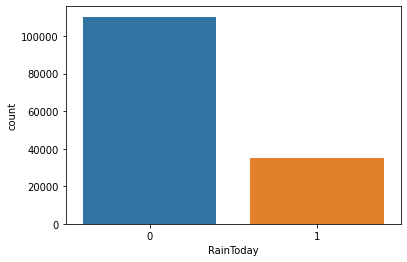

In [159]:
sns.countplot('RainToday',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


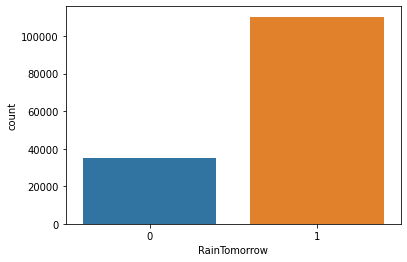

In [160]:
sns.countplot('RainTomorrow',data=df)

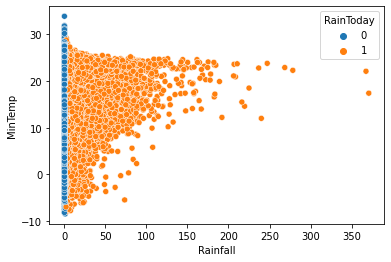

In [161]:
sns.scatterplot(x='Rainfall',y='MinTemp',hue='RainToday',data=df)

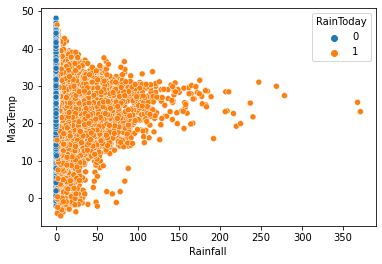

In [162]:
sns.scatterplot(x='Rainfall',y='MaxTemp',hue='RainToday',data=df)

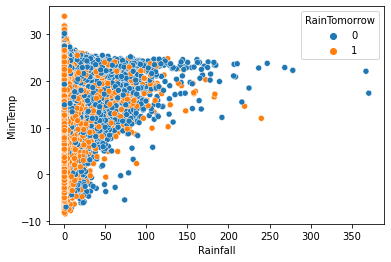

In [163]:
sns.scatterplot(x='Rainfall',y='MinTemp',hue='RainTomorrow',data=df)

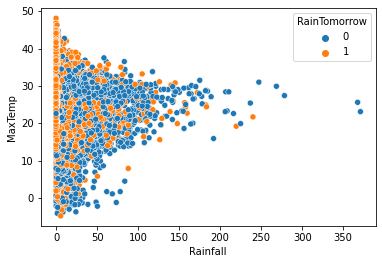

In [164]:
sns.scatterplot(x='Rainfall',y='MaxTemp',hue='RainTomorrow',data=df)

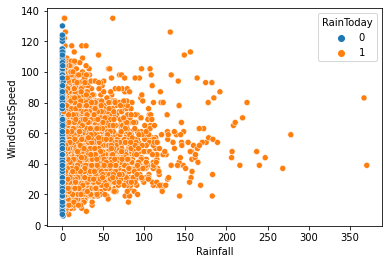

In [165]:
sns.scatterplot(x='Rainfall',y='WindGustSpeed',hue='RainToday',data=df)

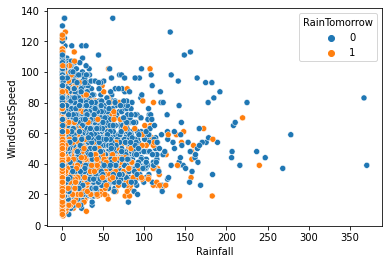

In [166]:
sns.scatterplot(x='Rainfall',y='WindGustSpeed',hue='RainTomorrow',data=df)

In [167]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,1,44.0,1,10,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,1,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,10,44.0,15,7,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,1,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,7,46.0,1,7,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,1,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,14,24.0,2,5,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,1,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,1,41.0,12,11,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,5,12


**Diving the datset into independent and dependent feature and droping out the columns which is not needed for model training**

In [168]:
X=df.drop(['Date','Location','RainTomorrow'],axis=1)#independent
y=df['RainTomorrow']#dependent

In [169]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,month
0,13.4,22.9,0.6,4.8,8.4,1,44.0,1,10,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,1,12
1,7.4,25.1,0.0,4.8,8.4,10,44.0,15,7,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,2,12
2,12.9,25.7,0.0,4.8,8.4,7,46.0,1,7,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,3,12
3,9.2,28.0,0.0,4.8,8.4,14,24.0,2,5,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,4,12
4,17.5,32.3,1.0,4.8,8.4,1,41.0,12,11,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,5,12


In [170]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow, dtype: int64

**Using correalation to check wheather the data is correlated or not for feature selection**

In [171]:
X.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,month
MinTemp,1.000000,0.733358,0.102692,0.364798,0.032632,0.023845,0.171899,0.042487,0.043433,0.173513,0.173055,-0.231310,0.006111,-0.423299,-0.432824,0.043056,0.000157,0.897683,0.699204,0.055026,0.002364,-0.202675
MaxTemp,0.733358,1.000000,-0.074071,0.447289,0.315487,0.081528,0.066451,0.078774,0.095687,0.014389,0.049507,-0.498350,-0.498725,-0.308057,-0.396339,-0.232311,-0.218368,0.879114,0.968683,-0.221324,0.000649,-0.162983
Rainfall,0.102692,-0.074071,1.000000,-0.042037,-0.169440,-0.027521,0.126155,-0.016320,-0.030563,0.085848,0.056575,0.221457,0.248959,-0.159060,-0.119547,0.165859,0.140600,0.011069,-0.077684,0.483126,0.001693,-0.031009
Evaporation,0.364798,0.447289,-0.042037,1.000000,0.279210,0.017933,0.149942,0.016143,0.010530,0.148681,0.101264,-0.384284,-0.293638,-0.213660,-0.233593,-0.169494,-0.160652,0.425673,0.434227,-0.139509,-0.004279,-0.019432
Sunshine,0.032632,0.315487,-0.169440,0.279210,1.000000,0.035859,-0.031229,0.011847,0.025752,-0.012197,0.023176,-0.330031,-0.430357,0.035759,-0.010618,-0.505488,-0.526045,0.191347,0.331724,-0.230481,-0.000320,0.017529
WindGustDir,0.023845,0.081528,-0.027521,0.017933,0.035859,1.000000,-0.056251,0.184977,0.321349,-0.043480,-0.023244,-0.026178,-0.029862,-0.005976,-0.052171,-0.027923,-0.022110,0.056976,0.082622,-0.063974,0.008891,0.022233
WindGustSpeed,0.171899,0.066451,0.126155,0.149942,-0.031229,-0.056251,1.000000,0.055474,-0.042549,0.578744,0.657975,-0.208803,-0.026804,-0.425819,-0.384140,0.046261,0.072894,0.145810,0.032473,0.148232,-0.008651,0.058797
WindDir9am,0.042487,0.078774,-0.016320,0.016143,0.011847,0.184977,0.055474,1.000000,0.140146,0.093218,0.030251,-0.095496,-0.047704,-0.070034,-0.095038,-0.035809,-0.006238,0.079690,0.071556,-0.039894,0.000617,0.030248
WindDir3pm,0.043433,0.095687,-0.030563,0.010530,0.025752,0.321349,-0.042549,0.140146,1.000000,-0.062374,-0.026920,-0.021931,-0.025847,-0.011387,-0.066740,-0.036324,-0.030098,0.068505,0.097443,-0.069621,0.012987,0.023443
WindSpeed9am,0.173513,0.014389,0.085848,0.148681,-0.012197,-0.043480,0.578744,0.093218,-0.062374,1.000000,0.512279,-0.268196,-0.031079,-0.215107,-0.165124,0.006593,0.028376,0.127560,0.004592,0.105446,-0.008679,0.050935


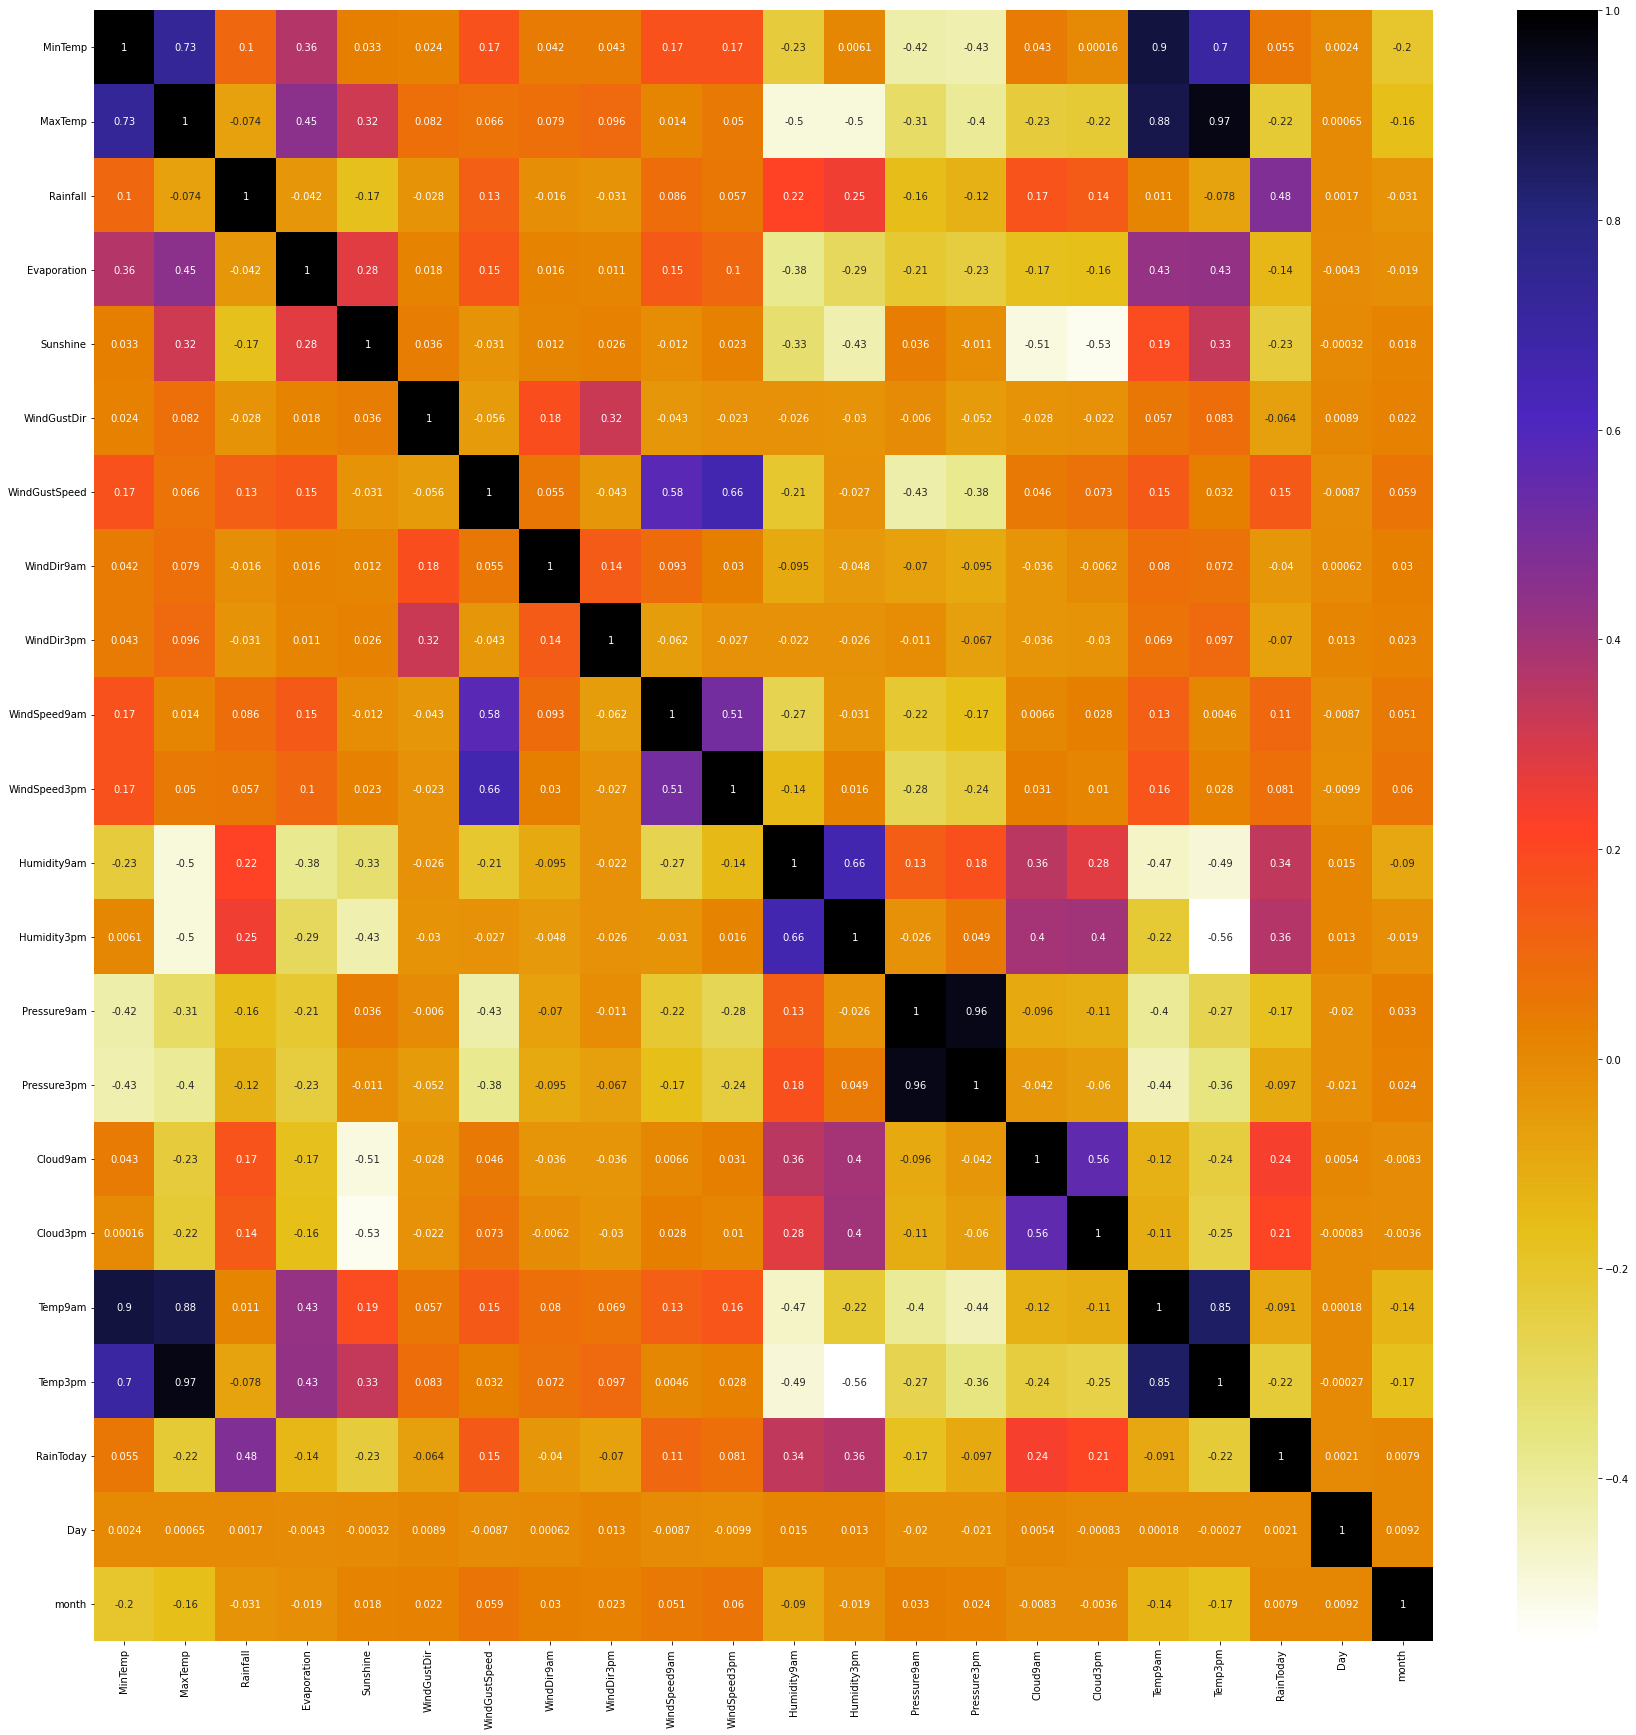

In [172]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [173]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [182]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

2

**After checking the correlation i founded 2 columns are highly correlated to each other but after droping those columns i have see decrease in accuracy so after that i didnt drop those columns**

In [183]:
corr_features

{'Pressure3pm', 'Temp3pm'}

In [227]:
X.shape

(145460, 22)

**Diving the independent and dependent feature for training and testing**

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [185]:
X_train.shape

(101822, 22)

In [186]:
X_test.shape

(43638, 22)

**So for model training i have choose differnt algorithms based on binary based classifcation and based on the performance result of these algorithm i will choose best algorithm for predictions**

In [233]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [234]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [238]:
print("Accuracy_Score:",accuracy_score(y_pred,y_test1)*100)

Accuracy_Score: 84.69453228837251


In [239]:
print("Classification Report:\n",classification_report(y_pred,y_test1))

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.77      0.63      7374
           1       0.95      0.86      0.90     36264

    accuracy                           0.85     43638
   macro avg       0.74      0.82      0.77     43638
weighted avg       0.88      0.85      0.86     43638



In [240]:
print("Confusion matrix\n",confusion_matrix(y_pred,y_test1))

Confusion matrix
 [[ 5672  1702]
 [ 4977 31287]]


In [198]:
model1=GradientBoostingClassifier()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [199]:
y_pred1

array([0, 1, 0, ..., 0, 1, 0])

In [201]:
print("Accuracy_Score:",accuracy_score(y_pred1,y_test)*100)
print("Confusion matrix\n",confusion_matrix(y_pred1,y_test))
print("Classification Report:\n",classification_report(y_pred1,y_test))

Accuracy_Score: 84.11247078234567
Confusion matrix
 [[ 5471  1755]
 [ 5178 31234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.76      0.61      7226
           1       0.95      0.86      0.90     36412

    accuracy                           0.84     43638
   macro avg       0.73      0.81      0.76     43638
weighted avg       0.88      0.84      0.85     43638



In [202]:
model2=AdaBoostClassifier()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [203]:
y_pred2

array([0, 1, 0, ..., 0, 1, 0])

In [204]:
print("Accuracy_Score:",accuracy_score(y_pred2,y_test)*100)
print("Confusion matrix\n",confusion_matrix(y_pred2,y_test))
print("Classification Report:\n",classification_report(y_pred2,y_test))

Accuracy_Score: 83.21417113524909
Confusion matrix
 [[ 5334  2010]
 [ 5315 30979]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.73      0.59      7344
           1       0.94      0.85      0.89     36294

    accuracy                           0.83     43638
   macro avg       0.72      0.79      0.74     43638
weighted avg       0.87      0.83      0.84     43638



In [212]:
sc=MinMaxScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [213]:
model3=BernoulliNB()
model3.fit(X_train_scaled,y_train)
y_pred3=model3.predict(X_test_scaled)

In [214]:
y_pred3

array([0, 1, 0, ..., 0, 1, 1])

In [215]:
print("Accuracy_Score:",accuracy_score(y_pred3,y_test)*100)
print("Confusion matrix\n",confusion_matrix(y_pred3,y_test))
print("Classification Report:\n",classification_report(y_pred3,y_test))

Accuracy_Score: 75.91777808332188
Confusion matrix
 [[ 5419  5279]
 [ 5230 27710]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51     10698
           1       0.84      0.84      0.84     32940

    accuracy                           0.76     43638
   macro avg       0.67      0.67      0.67     43638
weighted avg       0.76      0.76      0.76     43638



In [216]:
model4=LogisticRegression()
model4.fit(X_train_scaled,y_train)
y_pred4=model4.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [217]:
y_pred4

array([0, 1, 0, ..., 0, 1, 0])

In [218]:
print("Accuracy_Score:",accuracy_score(y_pred4,y_test)*100)
print("Confusion matrix\n",confusion_matrix(y_pred4,y_test))
print("Classification Report:\n",classification_report(y_pred4,y_test))

Accuracy_Score: 82.76043815023604
Confusion matrix
 [[ 5113  1987]
 [ 5536 31002]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.72      0.58      7100
           1       0.94      0.85      0.89     36538

    accuracy                           0.83     43638
   macro avg       0.71      0.78      0.73     43638
weighted avg       0.86      0.83      0.84     43638



In [219]:
import xgboost

In [220]:
model5=xgboost.XGBClassifier()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)

In [221]:
y_pred5

array([0, 1, 0, ..., 0, 1, 0])

In [222]:
print("Accuracy_Score:",accuracy_score(y_pred5,y_test)*100)
print("Confusion matrix\n",confusion_matrix(y_pred5,y_test))
print("Classification Report:\n",classification_report(y_pred5,y_test))

Accuracy_Score: 84.04372336037399
Confusion matrix
 [[ 5398  1712]
 [ 5251 31277]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.76      0.61      7110
           1       0.95      0.86      0.90     36528

    accuracy                           0.84     43638
   macro avg       0.73      0.81      0.75     43638
weighted avg       0.88      0.84      0.85     43638



**Conclusion: From All thse binary based algorithm RandomForest Classifier and XgBoost Classifier performed well in terms of accuracy**

In [241]:
input_data=y_pred[0]
if input_data==0:
  print("Rain will going to happen Tomorrow")
else:
  print("Rain will not going to happen Tomorrow")

Rain will going to happen Tomorrow


In [242]:
input_data=y_pred[1]
if input_data==0:
  print("Rain will going to happen Tomorrow")
else:
  print("Rain will not going to happen Tomorrow")

Rain will not going to happen Tomorrow
